## Integration

In [1]:
import uniport as up
import numpy as np
import pandas as pd
import scanpy as sc

Read preprocessed data

In [2]:
adata_atac = sc.read_h5ad('PBMC/atac.h5ad')
adata_rna = sc.read_h5ad('PBMC/rna.h5ad')
adata_cm = sc.read_h5ad('PBMC/atac_and_rna.h5ad')

In [3]:
adatas = [adata_atac, adata_rna]

Integrate scATAC-seq and scRNA-seq using both common and dataset-specific genes

dataset 0:
AnnData object with n_obs × n_vars = 11259 × 2000
    obs: 'cell_type', 'domain_id', 'source', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'
reference dataset 1
dataset 1:
AnnData object with n_obs × n_vars = 11259 × 2000
    obs: 'cell_type', 'domain_id', 'source', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'
reference dataset 1
AnnData object with n_obs × n_vars = 22518 × 2000
    obs: 'cell_type', 'domain_id', 'source', 'n_genes'
    var: 'n_cells-0', 'n_cells-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p'


2022-05-07 20:41:53,014 - root - INFO - model
VAE(
  (encoder): Encoder(
    (enc): ModuleList(
      (0): NN(
        (net): ModuleList(
          (0): Block(
            (fc): Linear(in_features=2000, out_features=1024, bias=True)
            (norm): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (act): ReLU()
          )
        )
      )
    )
    (mu_enc): ModuleList(
      (0): NN(
        (net): ModuleList(
          (0): Block(
            (fc): Linear(in_features=1024, out_features=16, bias=True)
          )
        )
      )
    )
    (var_enc): ModuleList(
      (0): NN(
        (net): ModuleList(
          (0): Block(
            (fc): Linear(in_features=1024, out_features=16, bias=True)
          )
        )
      )
    )
  )
  (decoder): Decoder(
    (dec): ModuleList(
      (0): NN(
        (net): ModuleList(
          (0): Block(
            (fc): Linear(in_features=16, out_features=2000, bias=True)
            (norm): DSBa

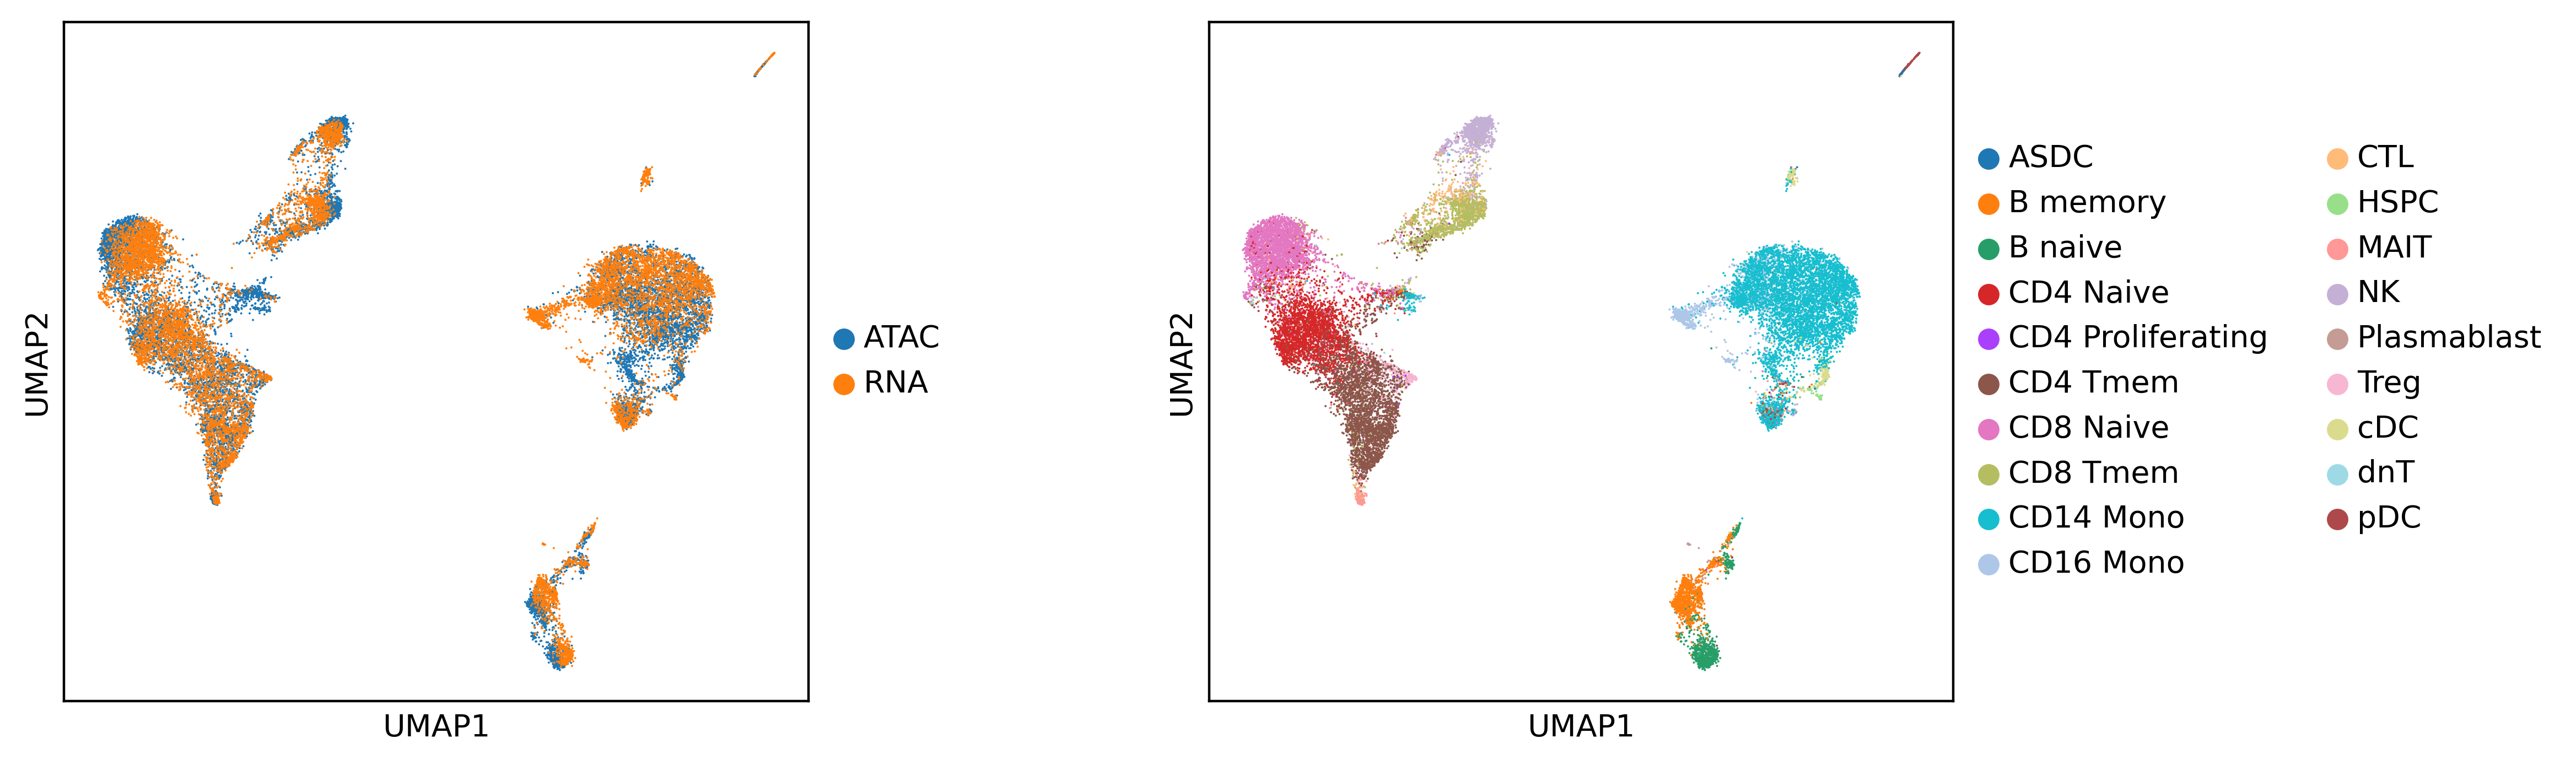

In [4]:
adata = up.Run(adatas=adatas, adata_cm=adata_cm, lambda_kl=1.0, lambda_s=1.0, show=True)